 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns

whale_returns_csv = (r'/Users/NACA_MAC/desktop/mia-mia-fin-pt-05-2021-u-c-master-Week4_Pandas/Week4_Pandas/Week4_Pandas_HW/Starter_Code/Resources/whale_returns.csv')
whale_returns = pd.read_csv (whale_returns_csv, index_col = "Date", parse_dates = True)
df = pd.DataFrame
whale_returns.sort_index(inplace=True)
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [3]:
# Count nulls

whale_returns.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [4]:
#Drop nulls

whale_returns.dropna(inplace=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns

algo_returns_csv = (r'/Users/NACA_MAC/desktop/mia-mia-fin-pt-05-2021-u-c-master-Week4_Pandas/Week4_Pandas/Week4_Pandas_HW/Starter_Code/Resources/algo_returns.csv')
algo_returns = pd.read_csv (algo_returns_csv, index_col = "Date", parse_dates = True)
algo_returns = algo_returns.sort_index()
algo_returns

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [6]:
# Count nulls

algo_returns.isnull()
algo_returns

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [7]:
#Drop nulls

algo_returns.dropna(inplace=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 returns

sp500_closing_prices_csv = (r'/Users/NACA_MAC/desktop/mia-mia-fin-pt-05-2021-u-c-master-Week4_Pandas/Week4_Pandas/Week4_Pandas_HW/Starter_Code/Resources/sp500_history.csv')
sp500_returns = pd.read_csv (sp500_closing_prices_csv, index_col= "Date", parse_dates= True)
df = pd.DataFrame
sp500_returns.sort_index(inplace=True)
sp500_returns

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03


In [9]:
# Check Data Types

sp500_returns.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types

sp500_returns ["Close"] = sp500_returns["Close"].str.replace('$','')
sp500_returns ["Close"] = sp500_returns["Close"].astype(float)
sp500_returns.tail()

<ipython-input-10-9561137b6b36>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_returns ["Close"] = sp500_returns["Close"].str.replace('$','')


,Close
Date,
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03
2019-04-22,2907.97
2019-04-23,2933.68


In [11]:
# Calculate Daily Returns

sp500_returns ["Close"] = sp500_returns["Close"].pct_change()
sp500_returns.tail()

,Close
Date,
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579
2019-04-22,0.001012
2019-04-23,0.008841


In [12]:
#Drop nulls

sp500_returns.dropna()
sp500_returns.tail()

,Close
Date,
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579
2019-04-22,0.001012
2019-04-23,0.008841


In [13]:
# Rename `Close` Column to be specific to this portfolio.

sp500_returns.columns = ["S&P 500"]
sp500_returns.tail()

,S&P 500
Date,
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579
2019-04-22,0.001012
2019-04-23,0.008841


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
 
combined_returns = pd.concat([whale_returns, algo_returns, sp500_returns], axis = "columns", join = "inner")
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

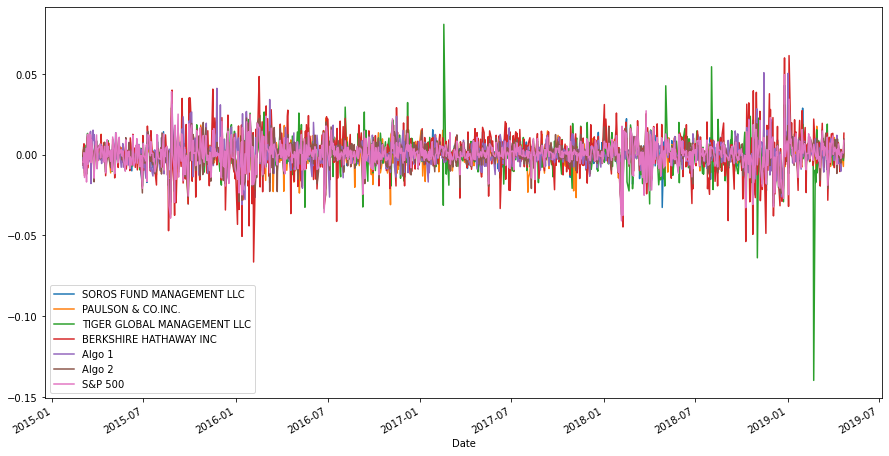

In [15]:
# Plot daily returns of all portfolios

combined_returns.plot(figsize=(15,8))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

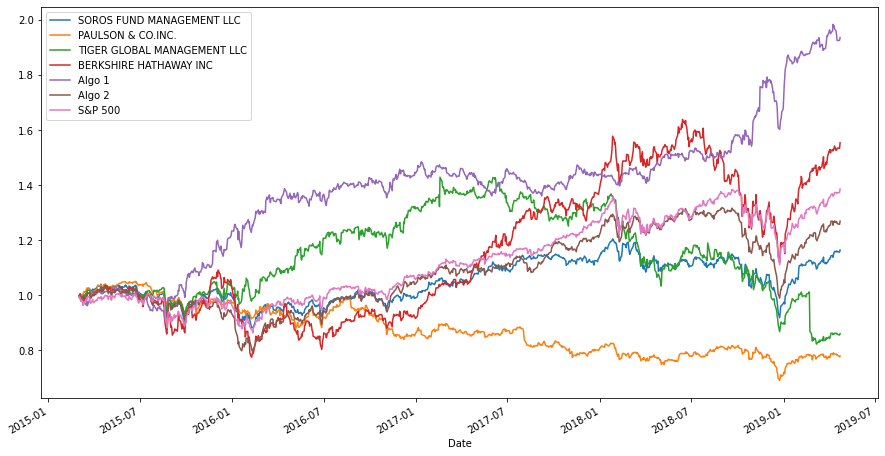

In [16]:
#Calculate cumulative returns of all portfolios

cumulative_returns = (1+combined_returns).cumprod()

#Plot cumulative returns

cumulative_returns.plot(figsize=(15,8))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

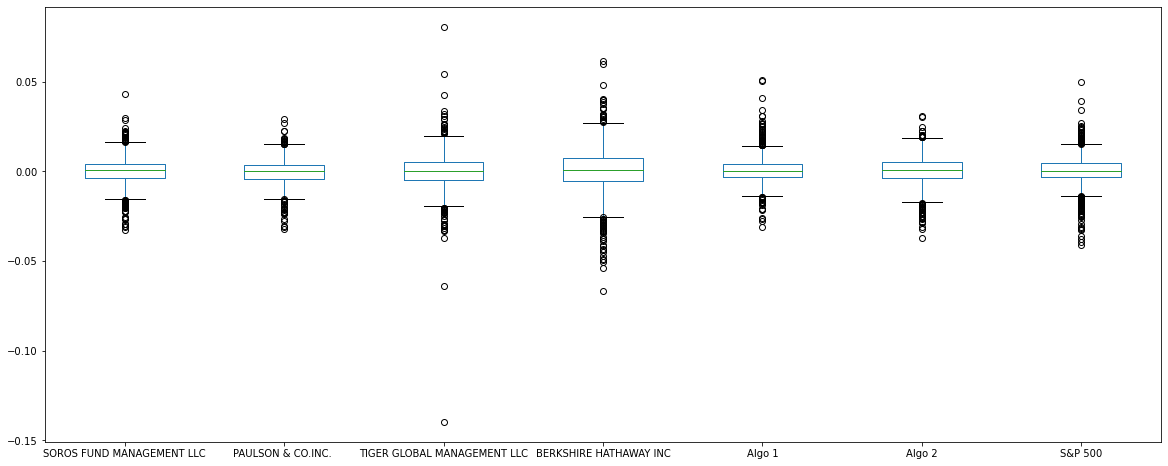

In [17]:
# Box plot to visually show risk

combined_returns.plot.box(figsize=(20,8))

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
 
daily_std = combined_returns.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500

standard_dev_sp500 = sp500_returns.std()
standard_dev_sp500

# Determine which portfolios are riskier than the S&P 500

riskier = daily_std[daily_std > daily_std["S&P 500"]]
riskier


TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)

annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

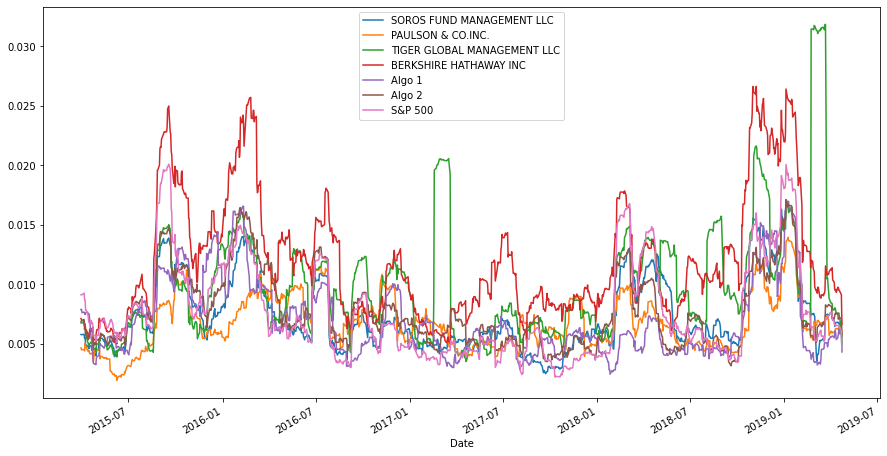

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

combined_returns.rolling(window=21).std()

# Plot the rolling standard deviation

combined_returns.rolling(window=21).std().plot(figsize=(15,8))

### Calculate and plot the correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


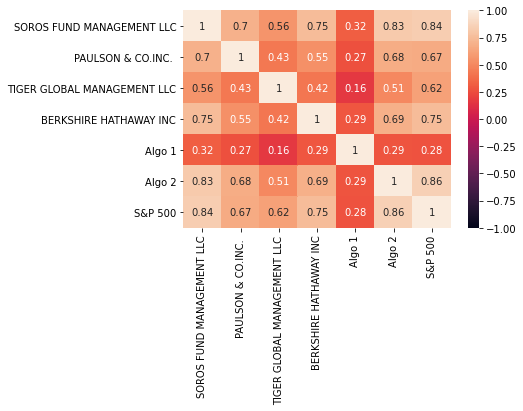

In [22]:
# Calculate the correlation

import seaborn as sns
correlation = combined_returns.corr()
sns.heatmap(correlation, vmin=-1, vmax=1,annot=True,)

# Display the correlation matrix

correlation

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 30-Day Beta of Algo 1'}, xlabel='Date'>

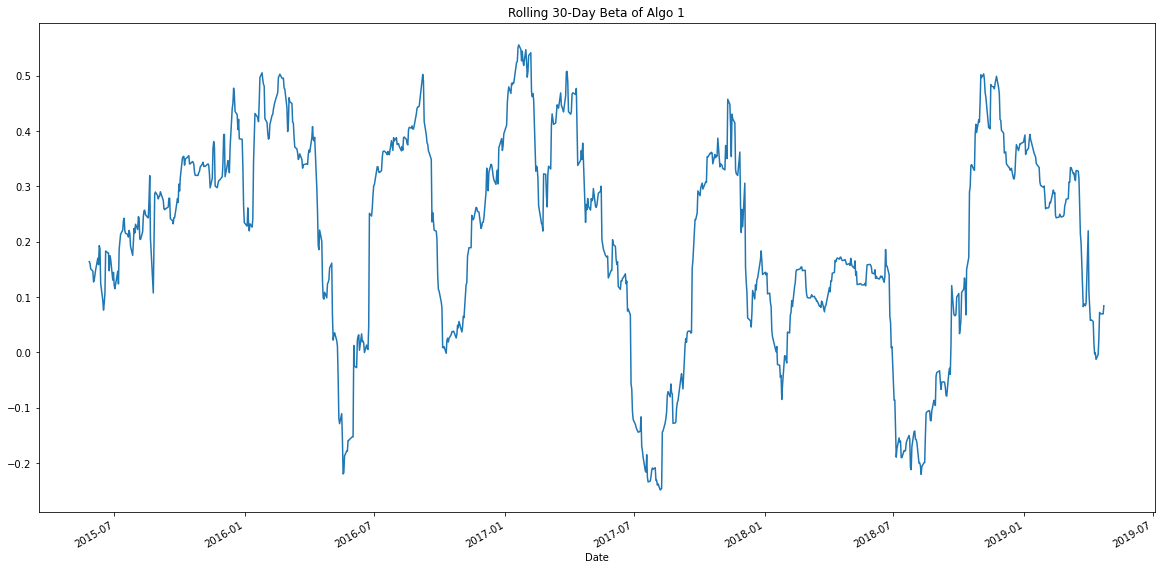

In [23]:
# Calculate covariance of a single portfolio

covariance = combined_returns['Algo 2'].cov(combined_returns['S&P 500'])

# Calculate variance of S&P 500

variance = combined_returns['S&P 500'].var()
beta = covariance / variance
beta

# Computing beta

rolling_covariance = combined_returns['Algo 1'].rolling(window=60).cov(combined_returns['S&P 500'])
rolling_variance = combined_returns['S&P 500'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance

# Plot beta trend

rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of Algo 1')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

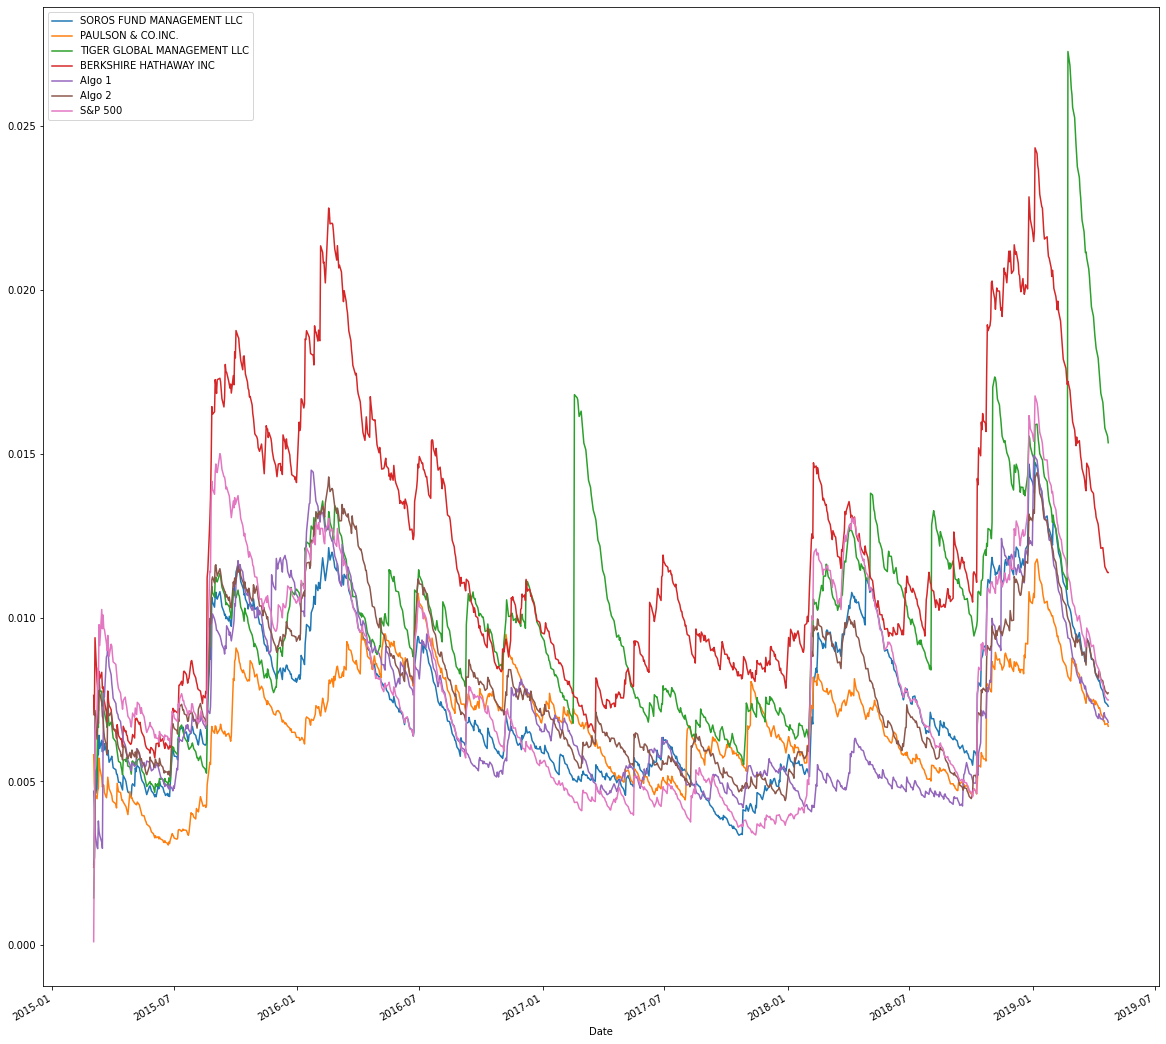

In [24]:
# Use `ewm` to calculate the rolling window

combined_returns.ewm(halflife=21).std().plot(figsize=(20,20))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
 # Annualized Sharpe Ratios
    
sharpe_ratios = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))
sharpe_ratios 

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharp Ratios'}>

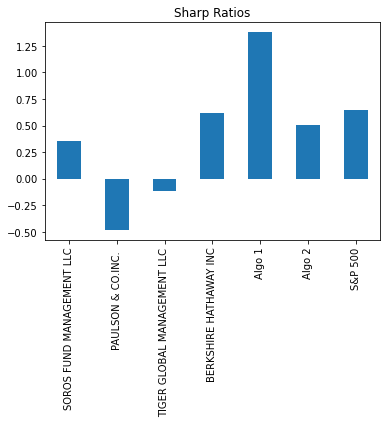

In [26]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.plot(kind = "bar", title = "Sharp Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [27]:
# Reading data from 1st stock

goog_csv = (r'/Users/NACA_MAC/desktop/mia-mia-fin-pt-05-2021-u-c-master-Week4_Pandas/Week4_Pandas/Week4_Pandas_HW/Starter_Code/Resources/goog_historical.csv')
goog_df = pd.read_csv(goog_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_df.rename( columns={"Symbol": "GOOG1","NOCP":"GOOG"},inplace = True )
goog_df.drop(columns=['GOOG1'], axis=1, inplace = True)
goog_df = goog_df.sort_index()
goog_df.head()

,GOOG
Trade DATE,
2018-05-11,1098.26
2018-05-14,1100.20
2018-05-15,1079.23
2018-05-16,1081.77
2018-05-17,1078.59


In [28]:
# Reading data from 2nd stock

aapl_csv = (r'/Users/NACA_MAC/desktop/mia-mia-fin-pt-05-2021-u-c-master-Week4_Pandas/Week4_Pandas/Week4_Pandas_HW/Starter_Code/Resources/aapl_historical.csv')
aapl_df = pd.read_csv(aapl_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_df.rename( columns={"Symbol": "AAPL1","NOCP":"AAPL"},inplace = True )
aapl_df.drop(columns=['AAPL1'], axis=1, inplace= True)
aapl_df = aapl_df.sort_index()
aapl_df.head()

,AAPL
Trade DATE,
2018-05-11,188.59
2018-05-14,188.15
2018-05-15,186.44
2018-05-16,188.18
2018-05-17,186.99


In [29]:
# Reading data from 3rd stock

cost_csv = (r'/Users/NACA_MAC/desktop/mia-mia-fin-pt-05-2021-u-c-master-Week4_Pandas/Week4_Pandas/Week4_Pandas_HW/Starter_Code/Resources/cost_historical.csv')
cost_df = pd.read_csv(cost_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_df.rename( columns={"Symbol": "COST1","NOCP":"COST"},inplace = True )
cost_df.drop(columns=['COST1'], axis=1,inplace = True)
cost_df = cost_df.sort_index()
cost_df.head()

,COST
Trade DATE,
2018-05-11,195.76
2018-05-14,195.88
2018-05-15,195.48
2018-05-16,198.71
2018-05-17,199.60


In [30]:
# Combine all stocks in a single DataFrame

all_stocks = pd.concat([cost_df, goog_df, aapl_df], axis = "columns", join = "inner")
all_stocks.head()

,COST,GOOG,AAPL
Trade DATE,,,
2018-05-11,195.76,1098.26,188.59
2018-05-14,195.88,1100.20,188.15
2018-05-15,195.48,1079.23,186.44
2018-05-16,198.71,1081.77,188.18
2018-05-17,199.60,1078.59,186.99


In [31]:
# Reset Date index

all_stocks.reset_index()

,Trade DATE,COST,GOOG,AAPL
0,2018-05-11,195.76,1098.26,188.59
1,2018-05-14,195.88,1100.20,188.15
2,2018-05-15,195.48,1079.23,186.44
3,2018-05-16,198.71,1081.77,188.18
4,2018-05-17,199.60,1078.59,186.99
...,...,...,...,...
245,2019-05-03,244.62,1185.40,211.75
246,2019-05-06,244.23,1189.39,208.48
247,2019-05-07,240.18,1174.10,202.86
248,2019-05-08,241.34,1166.27,202.90


In [32]:
# Reorganize portfolio data by having a column per symbol

all_stocks.sort_index()
all_stocks.head()

,COST,GOOG,AAPL
Trade DATE,,,
2018-05-11,195.76,1098.26,188.59
2018-05-14,195.88,1100.20,188.15
2018-05-15,195.48,1079.23,186.44
2018-05-16,198.71,1081.77,188.18
2018-05-17,199.60,1078.59,186.99


In [34]:
 # Calculate daily returns
    
daily_returns = all_stocks.pct_change()
daily_returns

# Drop NAs

daily_returns.dropna()

# Display sample data

daily_returns.tail()

,COST,GOOG,AAPL
Trade DATE,,,
2019-05-03,0.007953,0.019602,0.012431
2019-05-06,-0.001594,0.003366,-0.015443
2019-05-07,-0.016583,-0.012855,-0.026957
2019-05-08,0.004830,-0.006669,0.000197
2019-05-09,0.008826,-0.003335,-0.010744


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [35]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

portfolio_returns = daily_returns.dot(weights)

# Display sample data

custom = pd.DataFrame(portfolio_returns)
custom.head()


,0
Trade DATE,
2018-05-11,NaN
2018-05-14,0.000015
2018-05-15,-0.010064
2018-05-16,0.009403
2018-05-17,-0.001595


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [36]:
# Join your returns DataFrame to the original returns DataFrame

combined_portfolio_stocks = pd.concat([portfolio_returns, combined_returns], axis='columns', join='inner')
combined_portfolio_stocks.rename(columns= {0: "Custom"},inplace = True )

In [37]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

combined_portfolio_stocks.dropna(inplace=True)
combined_portfolio_stocks.head()

,Custom,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [38]:
#Calculate the annualized `std`

combined_portfolio_stocks.std()
annualized_variance = (combined_portfolio_stocks.var()*252)
annualized_std = np.sqrt(annualized_variance)
annualized_std

Custom                         0.211496
SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P 500                        0.152054
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

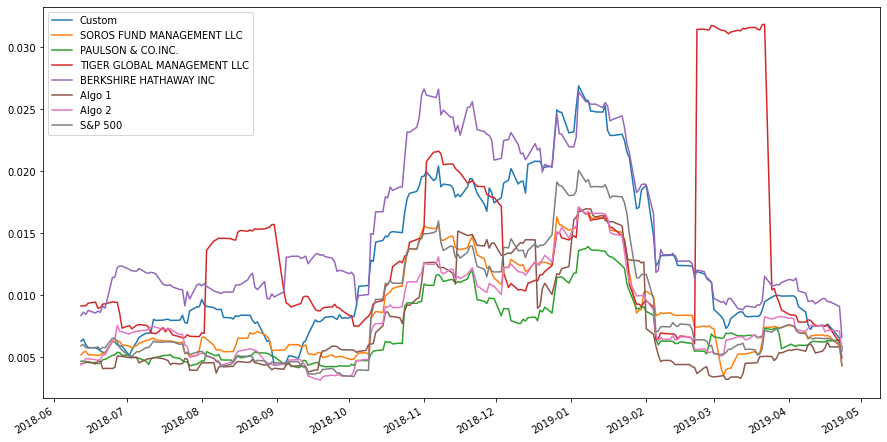

In [39]:
# Calculate rolling standard deviation

combined_portfolio_stocks.rolling(window=21).std()

# Plot rolling standard deviation

combined_portfolio_stocks.rolling(window=21).std().plot(figsize=(15,8))

### Calculate and plot the correlation

<AxesSubplot:>

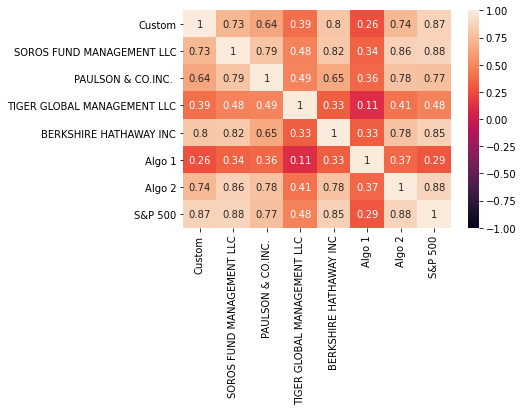

In [47]:
# Calculate and plot the correlation
correlation = combined_portfolio_stocks.corr()
sns.heatmap(correlation, vmin=-1, vmax=1,annot=True,)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Custom Beta'}>

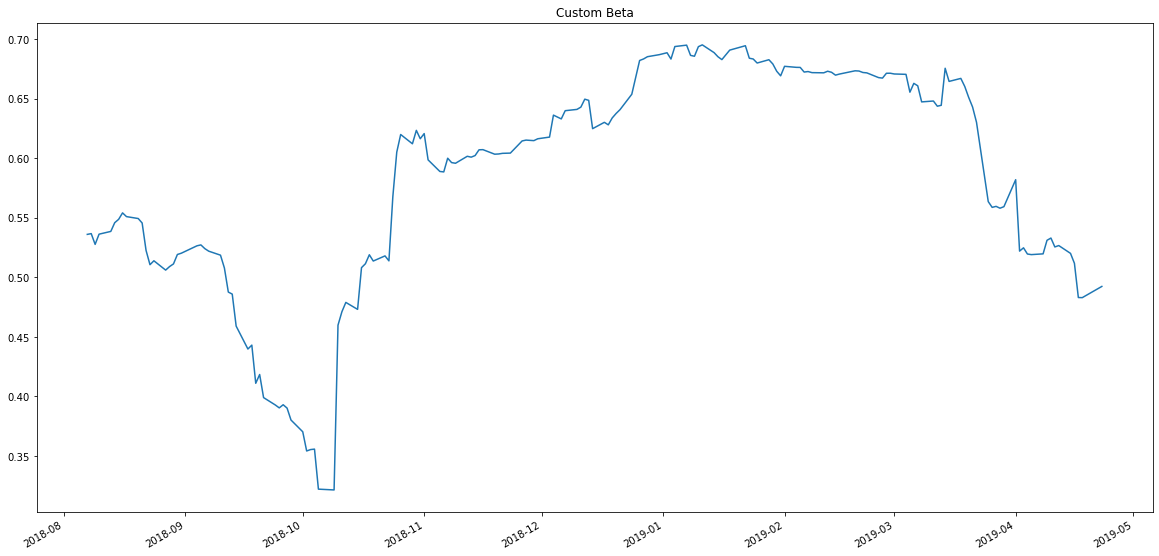

In [43]:
# Calculate and plot Beta

rolling_variance = combined_portfolio_stocks['Custom'].rolling(window=60).var()
rolling_covariance = combined_portfolio_stocks['Custom'].rolling(window=60).cov(combined_portfolio_stocks['S&P 500'])
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Custom Beta')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [44]:
# Calculate Annualzied Sharpe Ratios
 
sharpe_ratios = (combined_portfolio_stocks.mean() * 252) / (combined_portfolio_stocks.std() * np.sqrt(252))
sharpe_ratios 

Custom                         0.933123
SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500                        0.584820
dtype: float64

<AxesSubplot:title={'center':'Sharp Ratios'}>

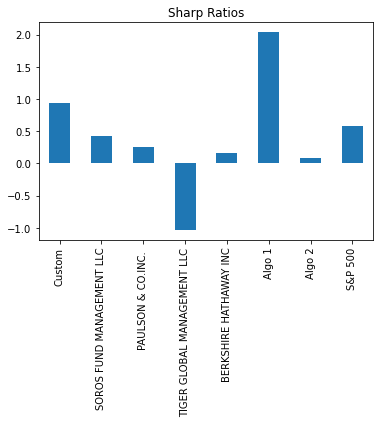

In [45]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.plot(kind = "bar", title = "Sharp Ratios")

### How does your portfolio do?

Write your answer here!

### Algo1 is most Succesful. Algo 2 is least succesful.